## Law of Large Numbers

As we collect more and more independent random variables, the average outcome gets closer and closer to the expected value.

For example:
- if we average N fair coin flips (C) (heads = 0, tails = 1), then the average outcome will get closer and closer to E[C] = .5 as N increases
- if we average N fair die rolls (D), then the average outcome will get closer and closer to E[D] = 3.5 

## Modelling a single output of a random variable
Change the values below and re-run the whole script, it should work with your own example.

In [80]:
# modelling a single random variable

# # coin flip (uncomment if you want to see this example)
# sample_space = [0, 1]
# prob = [.5, .5]

# die roll
sample_space = [1, 2, 3, 4, 5, 6]
prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# # high variance example
# sample_space = [0, 1, 100]
# prob = [.49, .49, .02]

In [30]:
from random import choices

# draw k=1 samples
# run this cell a few times and notice it gives a different random output
# each time!  Modify the prob values above and see how it changes the outcomes
choices(sample_space, weights=prob, k=1)

[1]

# Building a list of outcomes from N experiments

In [44]:
import numpy as np

n_max = 100

all_outcomes = choices(sample_space, weights=prob, k=n_max)
n_array = np.arange(1, N + 1)
average_outcome = np.divide(np.cumsum(all_outcomes), n_array)

# observe that the average_outcome in the n-th position is the average of the first n outcomes
# just print the first 10
all_outcomes[:4]

[2, 6, 3, 6]

In [41]:
average_outcome[:4]

array([4.        , 4.        , 3.66666667, 3.        ])

# Plot `average_outcome` vs `N`

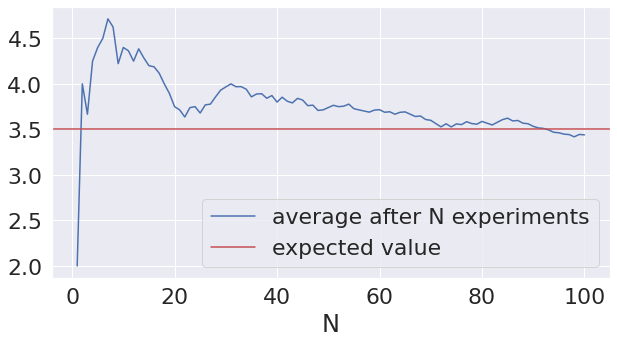

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

expected_value = np.dot(sample_space, prob)

plt.plot(n_array, average_outcome, label='average after N experiments')
plt.axhline(expected_value, label='expected value', color='r')
plt.xlabel('N')
plt.legend()
plt.gcf().set_size_inches(10, 5)

# Maybe we just got lucky in this example, could we repeat that a whole bunch?

We can!

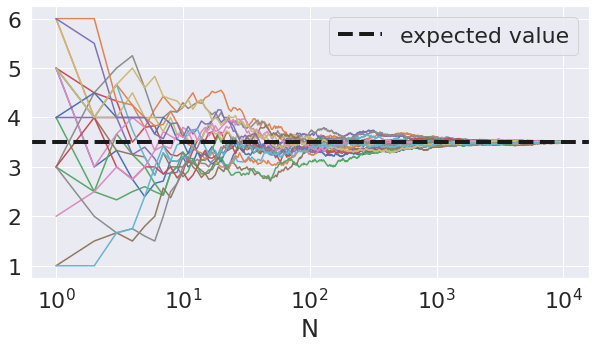

In [77]:
import numpy as np

n_max = 10000
n_repeats = 20

# sample an outcome for every experiment (of every repeat)
all_outcomes = choices(sample_space, weights=prob, k=n_max * n_repeats)
all_outcomes = np.array(all_outcomes).reshape(n_repeats, n_max)

# compute the average outcome
n_array = np.arange(1, n_max + 1)
average_outcome = np.divide(np.cumsum(all_outcomes, axis=1), n_array)

# compute expected value
expected_value = np.dot(sample_space, prob)

# plot
plt.plot(n_array, average_outcome.T)
plt.axhline(expected_value, label='expected value', color='k', linestyle='--', linewidth=4)
plt.xlabel('N')
plt.legend()
plt.gca().set_xscale('log')
plt.gcf().set_size_inches(10, 5)